# Time series

In this notebook I will explore how to implement a simple time series and validate it using proper scoring metrics from a package named `pscore`. Our initial foray will follow along from a tutorial by Varshita Sher (available [here](https://towardsdatascience.com/time-series-analysis-using-pandas-in-python-f726d87a97d8) ).

The data we are using here is appears to faily electircity consumption in Germany from 2006 to 2018.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##read in publically available data
url='https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
data = pd.read_csv(url,sep=",", parse_dates=['Date'], index_col=['Date'])

#fill in missing days and set index to daily frequency
data_freq = data.asfreq('D', method = 'ffill')
data_freq

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


Let's plot the data to have a quick look at it.

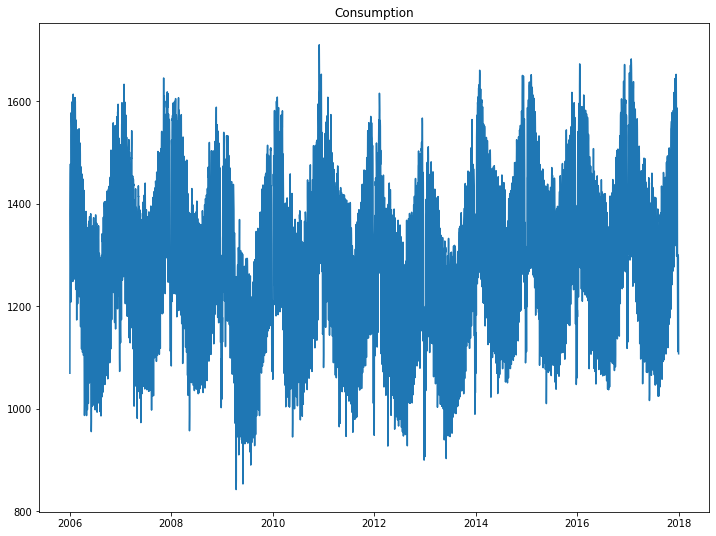

In [14]:
fig, ax = plt.subplots(figsize=(12,9))

ax.plot(data_freq.Consumption)
ax.set_title("Consumption")
plt.show()

Very typical of time series data, where there is clearly seasonal trends as well as potentially weekly trends. There may also be an overall trend to examine. The tutorial by Varshita then goes on to explain how to examine the trends and the implications of de-trending the time series. The key takeaways in my mind are:

* A time series with a trend is called non-stationary (it's mean value changes over time),
* A time series without a trend is called stationary,
* Stationary time series can be used as input for learning algorithms,
* Trends can be removed from a time series by differencing.

## Validation

Forward Chaining validation